# Practice 4

Используя индикаторы технического анализа и инструментальные средства смоделировать задачи принятия решений на спотовом рынке.

## Var 3

Газпром АО

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### Moving Average

In [2]:
window_size = 9

In [3]:
df_moving_average = pd \
    .read_csv('GAZP_211205_220305_per_hour.csv', sep=";") \
    .rename(columns=lambda name: name[1:-1].lower())

moving_average_columns = ["ticker", "per", "date", "time", "close"]

# print(df_moving_average[moving_average_columns].head().to_latex())
# print(df_moving_average[moving_average_columns].tail().to_latex())
df_moving_average[moving_average_columns]

,ticker,per,date,time,close
0,GAZP,60,06/12/21,08:00:00,348.22
1,GAZP,60,06/12/21,09:00:00,348.50
2,GAZP,60,06/12/21,10:00:00,348.05
3,GAZP,60,06/12/21,11:00:00,346.90
4,GAZP,60,06/12/21,12:00:00,336.67
...,...,...,...,...,...
961,GAZP,60,25/02/22,20:00:00,231.89
962,GAZP,60,25/02/22,21:00:00,230.29
963,GAZP,60,25/02/22,22:00:00,224.12
964,GAZP,60,25/02/22,23:00:00,223.32


In [4]:
df_moving_average['mov_avg'] = df_moving_average.close.rolling(window_size).mean()

# print(df_moving_average[moving_average_columns + ['mov_avg']].dropna().head().to_latex())
# print(df_moving_average[moving_average_columns + ['mov_avg']].dropna().tail().to_latex())


df_moving_average[moving_average_columns + ['mov_avg']].head(15)


,ticker,per,date,time,close,mov_avg
0,GAZP,60,06/12/21,08:00:00,348.22,NaN
1,GAZP,60,06/12/21,09:00:00,348.50,NaN
2,GAZP,60,06/12/21,10:00:00,348.05,NaN
3,GAZP,60,06/12/21,11:00:00,346.90,NaN
4,GAZP,60,06/12/21,12:00:00,336.67,NaN
5,GAZP,60,06/12/21,13:00:00,336.24,NaN
6,GAZP,60,06/12/21,14:00:00,335.04,NaN
7,GAZP,60,06/12/21,15:00:00,338.31,NaN
8,GAZP,60,06/12/21,16:00:00,336.96,341.654444
9,GAZP,60,06/12/21,17:00:00,336.33,340.333333


In [5]:
def plot_ma(left=None, right=None):
    plt.figure(figsize=(12, 8))
    plt.plot(df_moving_average[left:right].close, label="Close")
    plt.plot(df_moving_average[left:right].mov_avg, label="MA")
    plt.grid(True, 'both')
    plt.legend(fontsize="large")
    plt.show()

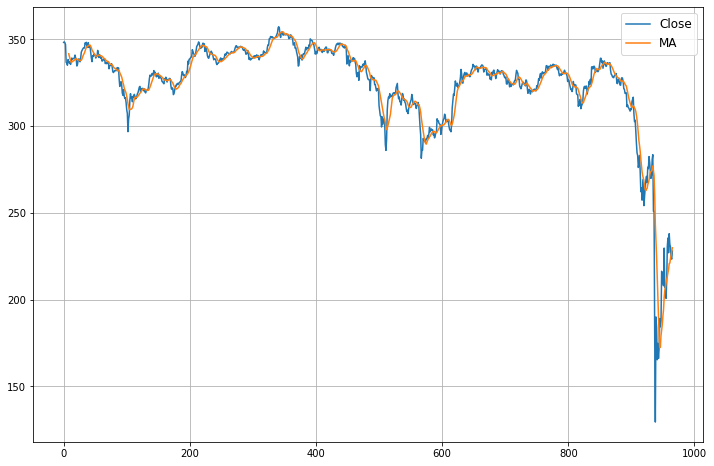

In [6]:
plot_ma()

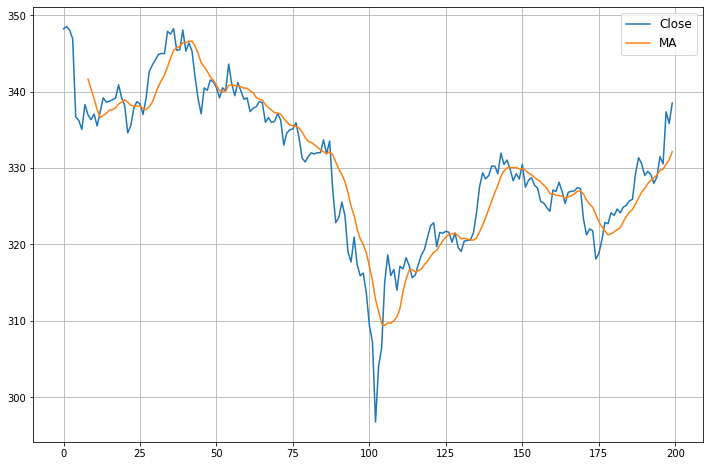

In [7]:
plot_ma(right=200)

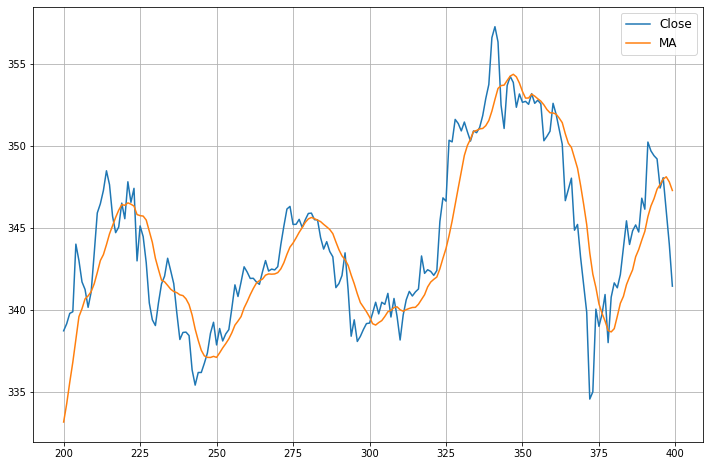

In [8]:
plot_ma(left=200, right=400)


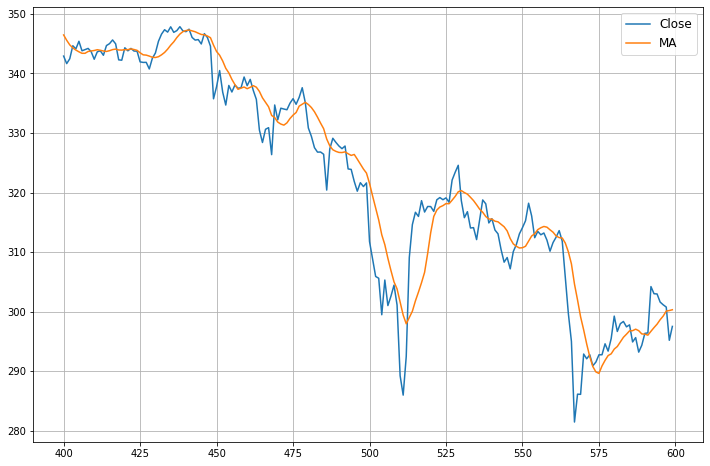

In [9]:
plot_ma(left=400, right=600)


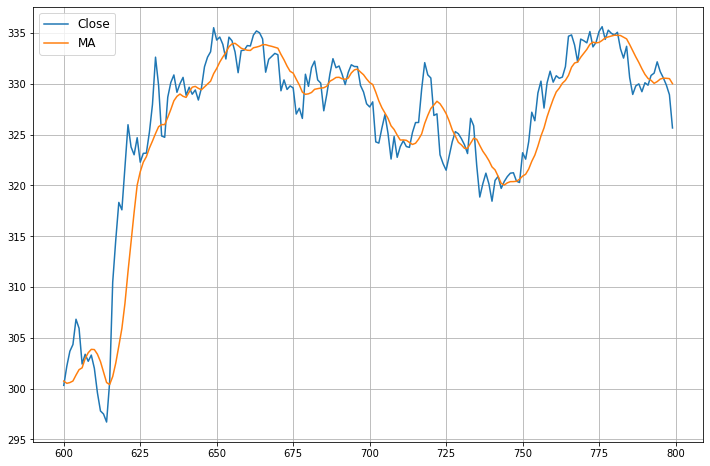

In [10]:
plot_ma(left=600, right=800)


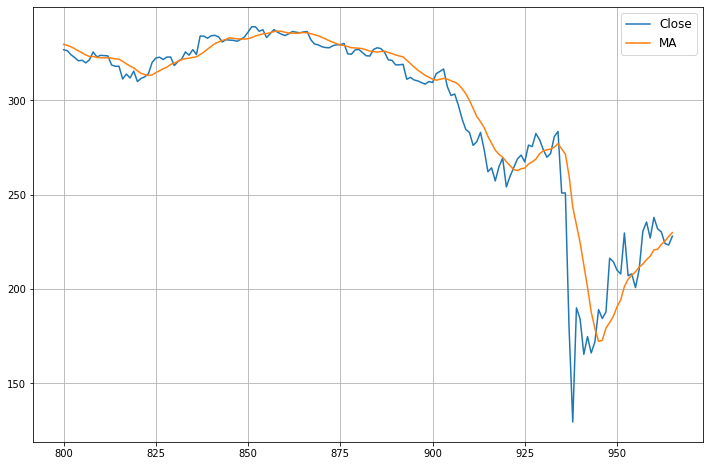

In [11]:
plot_ma(left=800,)


#### Стратегия покупки и продажи

In [12]:
over_average = True
bought = 0
sold = 0

def f_1(row):
    global over_average
    global bought
    global sold

    # Сверху вниз, продаем
    if over_average and row.close <= row.mov_avg and bought > sold:
        sold += 1
        over_average = row.close > row.mov_avg
        return row.close

    # Снизу вверх, покупаем
    elif not over_average and row.close >= row.mov_avg:
        bought += 1
        over_average = row.close > row.mov_avg
        return -row.close

    over_average = row.close > row.mov_avg

print(df_moving_average[["close", "mov_avg"]].apply(f_1, axis=1).sum())
print(bought)
print(sold)


-3.5900000000004297
84
84


### Модификация

11.669999999999618
103
103


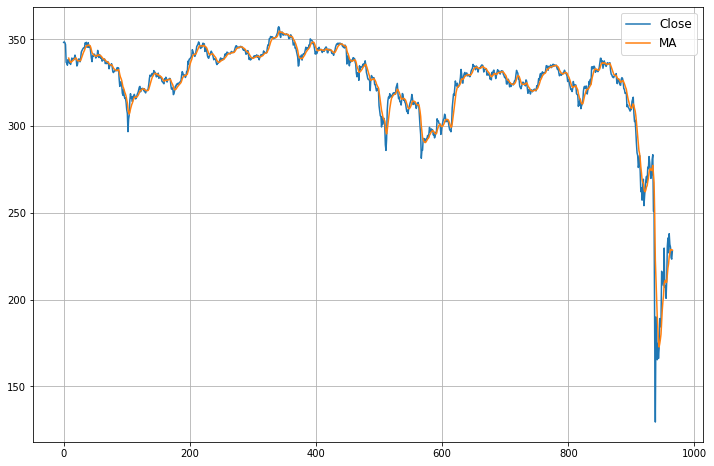

In [13]:
window_size_wma = 9
weights = np.arange(1, window_size_wma + 1)

df_moving_average['wma'] = df_moving_average.close.rolling(window_size_wma)\
    .apply(lambda x: np.sum(weights*x)/np.sum(weights))

over_average = True
bought = 0
sold = 0

def f_2(row):
    global over_average
    global bought
    global sold

    # Сверху вниз, продаем
    if over_average and row.close <= row.wma and bought > sold:
        sold += 1
        over_average = row.close > row.wma
        return row.close

    # Снизу вверх, покупаем
    elif not over_average and row.close >= row.wma:
        bought += 1
        over_average = row.close > row.wma
        return -row.close

    over_average = row.close > row.wma

print(df_moving_average[["close", "wma"]].apply(f_2, axis=1).sum())
print(bought)
print(sold)

left = 0
right = 1000
plt.figure(figsize=(12, 8))
plt.plot(df_moving_average[left:right].close, label="Close")
plt.plot(df_moving_average[left:right].wma, label="MA")
plt.grid(True, 'both')
plt.legend(fontsize="large")
plt.show()

In [14]:
over_average = True
bought = False

def f_1(row):
    global over_average
    global bought
    global sold

    # Сверху вниз, продаем
    if over_average and row.close <= row.mov_avg and bought:
        bought = False
        over_average = row.close > row.mov_avg
        return row.close

    # Снизу вверх, покупаем
    elif not over_average and row.close >= row.mov_avg and not bought:
        bought = True
        over_average = row.close > row.mov_avg
        return -row.close

    over_average = row.close > row.mov_avg

print(df_moving_average[["close", "mov_avg"]].apply(f_1, axis=1).sum())
print(bought)

-3.5900000000004297
False


### Force Index

In [24]:
df_force_index = pd.read_csv('GAZP_211205_220305_per_day.csv', sep=";").rename(columns=lambda name: name[1:-1].lower())
force_index_columns = ["ticker", "date", "close", "vol"]
# print(df_force_index[force_index_columns].head().to_latex())
# print(df_force_index[force_index_columns].tail().to_latex())

df_force_index

,ticker,per,date,time,open,high,low,close,vol
0,GAZP,D,06/12/21,00:00:00,347.27,349.36,333.35,338.94,70924550
1,GAZP,D,07/12/21,00:00:00,339.25,346.00,333.43,344.96,75507480
2,GAZP,D,08/12/21,00:00:00,346.00,348.47,336.53,340.50,78321390
3,GAZP,D,09/12/21,00:00:00,341.45,344.20,335.72,336.60,61406510
4,GAZP,D,10/12/21,00:00:00,337.02,338.31,329.98,332.00,44642520
5,GAZP,D,13/12/21,00:00:00,333.09,334.88,305.76,307.26,140577980
6,GAZP,D,14/12/21,00:00:00,306.99,320.00,289.78,319.35,168672960
7,GAZP,D,15/12/21,00:00:00,319.65,325.83,316.50,324.09,79742820
8,GAZP,D,16/12/21,00:00:00,326.18,332.30,325.38,328.39,95469330
9,GAZP,D,17/12/21,00:00:00,327.98,329.70,323.03,327.30,72099410


In [16]:
df_force_index["force"] = df_force_index.vol * df_force_index.close.diff(1)
df_force_index.dropna(inplace=True)

print(df_force_index[force_index_columns + ["force"]].head().to_latex())
print(df_force_index[force_index_columns + ["force"]].tail().to_latex())

df_force_index.head(10)

\begin{tabular}{lllrrr}
\toprule
{} & ticker &      date &   close &        vol &         force \\
\midrule
1 &   GAZP &  07/12/21 &  344.96 &   75507480 &  4.545550e+08 \\
2 &   GAZP &  08/12/21 &  340.50 &   78321390 & -3.493134e+08 \\
3 &   GAZP &  09/12/21 &  336.60 &   61406510 & -2.394854e+08 \\
4 &   GAZP &  10/12/21 &  332.00 &   44642520 & -2.053556e+08 \\
5 &   GAZP &  13/12/21 &  307.26 &  140577980 & -3.477899e+09 \\
\bottomrule
\end{tabular}

\begin{tabular}{lllrrr}
\toprule
{} & ticker &      date &   close &        vol &         force \\
\midrule
52 &   GAZP &  18/02/22 &  309.48 &  125452970 & -1.760105e+09 \\
53 &   GAZP &  21/02/22 &  257.30 &  413243360 & -2.156304e+10 \\
54 &   GAZP &  22/02/22 &  283.51 &  324922990 &  8.516232e+09 \\
55 &   GAZP &  24/02/22 &  210.00 &  413550130 & -3.040007e+10 \\
56 &   GAZP &  25/02/22 &  228.00 &  211877250 &  3.813790e+09 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_6577/300569317.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_force_index[force_index_columns + ["force"]].head().to_latex())
/tmp/ipykernel_6577/300569317.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_force_index[force_index_columns + ["force"]].tail().to_latex())


,ticker,per,date,time,open,high,low,close,vol,force
1,GAZP,D,07/12/21,00:00:00,339.25,346.00,333.43,344.96,75507480,4.545550e+08
2,GAZP,D,08/12/21,00:00:00,346.00,348.47,336.53,340.50,78321390,-3.493134e+08
3,GAZP,D,09/12/21,00:00:00,341.45,344.20,335.72,336.60,61406510,-2.394854e+08
4,GAZP,D,10/12/21,00:00:00,337.02,338.31,329.98,332.00,44642520,-2.053556e+08
5,GAZP,D,13/12/21,00:00:00,333.09,334.88,305.76,307.26,140577980,-3.477899e+09
6,GAZP,D,14/12/21,00:00:00,306.99,320.00,289.78,319.35,168672960,2.039256e+09
7,GAZP,D,15/12/21,00:00:00,319.65,325.83,316.50,324.09,79742820,3.779810e+08
8,GAZP,D,16/12/21,00:00:00,326.18,332.30,325.38,328.39,95469330,4.105181e+08
9,GAZP,D,17/12/21,00:00:00,327.98,329.70,323.03,327.30,72099410,-7.858836e+07
10,GAZP,D,20/12/21,00:00:00,324.00,326.00,316.11,325.90,70795770,-9.911408e+07


In [17]:

df_force_index["fi_ema2"] = df_force_index.force.ewm(min_periods=2, span=2, adjust=False).mean()
df_force_index["fi_ema13"] = df_force_index.force.ewm(min_periods=13, span=13, adjust=False).mean()

print(
    df_force_index[force_index_columns + ["force", "fi_ema2", "fi_ema13"]] \
        .dropna() \
        .round(3) \
        .head() \
        .to_latex()
)

print(
    df_force_index[force_index_columns + ["force", "fi_ema2", "fi_ema13"]] \
        .dropna() \
        .round(3) \
        .tail() \
        .to_latex()
)

df_force_index.dropna().head(10)


\begin{tabular}{lllrrrrr}
\toprule
{} & ticker &      date &   close &       vol &        force &       fi\_ema2 &      fi\_ema13 \\
\midrule
13 &   GAZP &  23/12/21 &  339.81 &  72129000 & -414020460.0 & -7.249013e+07 &  1.610582e+08 \\
14 &   GAZP &  24/12/21 &  338.79 &  39005950 &  -39786069.0 & -5.068742e+07 &  1.323661e+08 \\
15 &   GAZP &  27/12/21 &  343.97 &  29925890 &  155016110.2 &  8.644827e+07 &  1.356019e+08 \\
16 &   GAZP &  28/12/21 &  343.23 &  34848840 &  -25788141.6 &  1.162399e+07 &  1.125461e+08 \\
17 &   GAZP &  29/12/21 &  340.33 &  43005060 & -124714674.0 & -7.926845e+07 &  7.865174e+07 \\
\bottomrule
\end{tabular}

\begin{tabular}{lllrrrrr}
\toprule
{} & ticker &      date &   close &        vol &         force &       fi\_ema2 &      fi\_ema13 \\
\midrule
52 &   GAZP &  18/02/22 &  309.48 &  125452970 & -1.760105e+09 & -1.423062e+09 & -2.838182e+08 \\
53 &   GAZP &  21/02/22 &  257.30 &  413243360 & -2.156304e+10 & -1.484971e+10 & -3.323707e+09 \\
54 &   GAZP

/tmp/ipykernel_6577/3440562023.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_force_index[force_index_columns + ["force", "fi_ema2", "fi_ema13"]] \
/tmp/ipykernel_6577/3440562023.py:13: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_force_index[force_index_columns + ["force", "fi_ema2", "fi_ema13"]] \


,ticker,per,date,time,open,high,low,close,vol,force,fi_ema2,fi_ema13
13,GAZP,D,23/12/21,00:00:00,346.10,348.32,337.00,339.81,72129000,-4.140205e+08,-7.249013e+07,1.610582e+08
14,GAZP,D,24/12/21,00:00:00,339.30,340.98,334.55,338.79,39005950,-3.978607e+07,-5.068742e+07,1.323661e+08
15,GAZP,D,27/12/21,00:00:00,339.68,343.97,339.33,343.97,29925890,1.550161e+08,8.644827e+07,1.356019e+08
16,GAZP,D,28/12/21,00:00:00,344.04,346.60,342.55,343.23,34848840,-2.578814e+07,1.162399e+07,1.125461e+08
17,GAZP,D,29/12/21,00:00:00,343.30,344.48,337.13,340.33,43005060,-1.247147e+08,-7.926845e+07,7.865174e+07
18,GAZP,D,30/12/21,00:00:00,340.75,344.00,337.40,342.39,40853240,8.415767e+07,2.968230e+07,7.943830e+07
19,GAZP,D,03/01/22,00:00:00,345.01,353.88,344.30,353.73,40057980,4.542575e+08,3.127324e+08,1.329839e+08
20,GAZP,D,04/01/22,00:00:00,353.99,358.10,348.35,352.55,52693510,-6.217834e+07,6.279191e+07,1.051036e+08
21,GAZP,D,05/01/22,00:00:00,351.90,353.50,331.55,335.00,80969440,-1.421014e+09,-9.264118e+08,-1.129132e+08
22,GAZP,D,06/01/22,00:00:00,335.80,347.67,330.11,346.13,74572470,8.299916e+08,2.445238e+08,2.178751e+07


In [18]:
def plot_ema(left=None, right=None):
    display_frame = df_force_index[left:right]

    plt.figure(figsize=(12, 8))
    plt.bar(x=display_frame.force.axes[0], height=display_frame.force, label="Force Index")
    plt.plot(display_frame.fi_ema2, color="k", label="FI:2-EMA")
    plt.plot(display_frame.fi_ema13, color="r", label="FI:13-EMA")
    plt.grid(True, 'both')
    plt.legend(fontsize="large")
    plt.show()


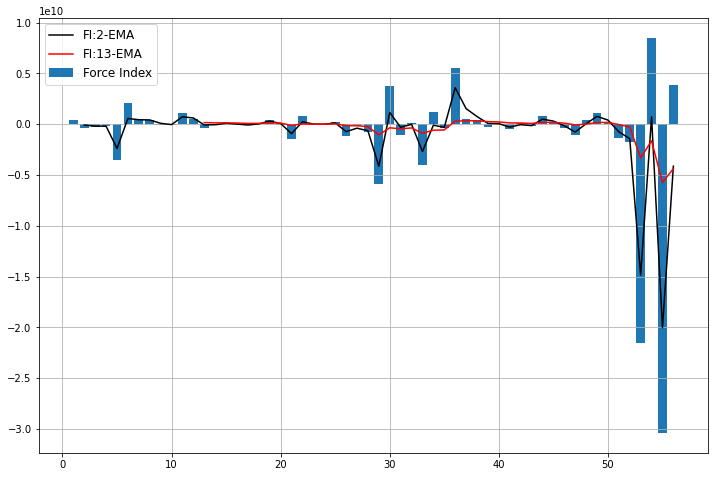

In [19]:
plot_ema()

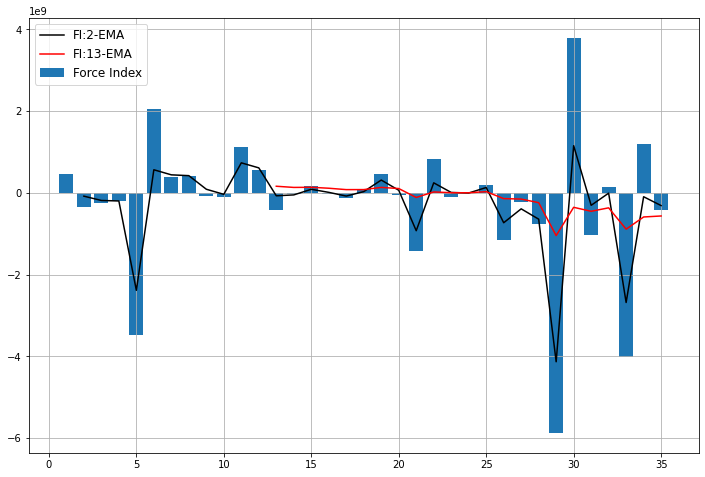

In [20]:
plot_ema(right=35)

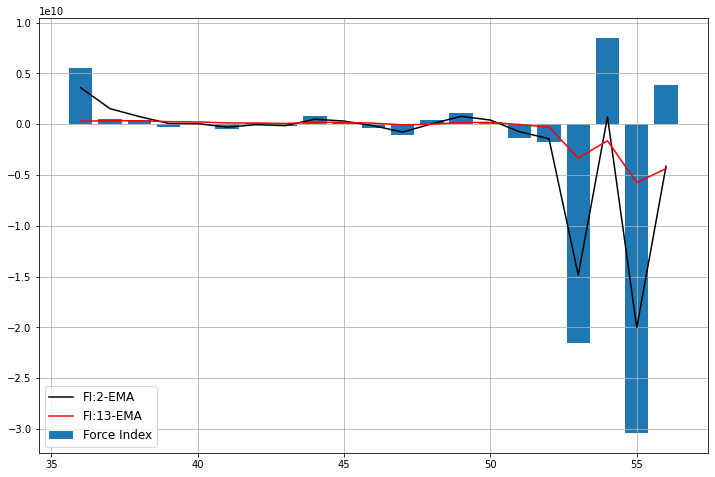

In [21]:
plot_ema(left=35)

#### Акция покупается каждый раз, как соблюдается условие

In [22]:
bought = []
sold = []

def ema_f(row):
    global bought
    global sold

    # buy
    if row.fi_ema2 < 0 and row.fi_ema13 > 0:
        bought.append(row.name)
        return -row.close
    
    # sell
    elif row.fi_ema2 > 0 and row.fi_ema13 < 0 and len(bought) > len(sold):
        sold.append(row.name)
        return row.close


print(df_force_index[["date", "close", "fi_ema2", "fi_ema13"]].apply(ema_f, axis=1).sum())
print(df_force_index.date[bought])
print(df_force_index.date[sold])


-2059.33
13    23/12/21
14    24/12/21
17    29/12/21
24    11/01/22
41    03/02/22
42    04/02/22
43    07/02/22
46    10/02/22
Name: date, dtype: object
30    19/01/22
54    22/02/22
Name: date, dtype: object


#### На руках может быть только одна акция

In [23]:
bought = False

def ema_f(row):
    global bought

    if row.fi_ema2 < 0 and row.fi_ema13 > 0 and not bought:
        bought = True
        return -row.close
    elif bought:
        bought = False
        return row.close



print(df_force_index[["close", "fi_ema2", "fi_ema13"]].apply(ema_f, axis=1).sum())
print(bought)


5.2000000000000455
False
